In [1]:
import pandas as pd

from sklearn import datasets

In [2]:
data = datasets.load_iris()

In [3]:
data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [4]:
df_iris = pd.DataFrame(data.data, columns=data.feature_names)

In [5]:
df_iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [6]:
df_iris['species'] = data.target

In [7]:
data.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [9]:
df_iris.describe(percentiles=[0.85, 0.95, 0.99])

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
85%,6.700000,3.500000,5.600000,2.065000,2.000000
95%,7.255000,3.800000,6.100000,2.300000,2.000000
99%,7.700000,4.151000,6.700000,2.500000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [10]:
df_iris['species'].unique()

array([0, 1, 2])

In [11]:
df_iris['species'].value_counts(normalize= True)

0    0.333333
1    0.333333
2    0.333333
Name: species, dtype: float64

#### iris data visualization [https://chart-studio.plotly.com/~jhl267/2/iris-dataset/#/]

In [17]:
df_iris.head()

,sepal_length_(cm),sepal_width_(cm),petal_length_(cm),petal_width_(cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [8]:
df_iris.columns = df_iris.columns.str.replace(' ', '_')

In [9]:
df_iris['species'] = df_iris['species'].map({0:'setosa', 1:'versicolor', 2:'virginica'})

In [10]:
df_iris.head()

,sepal_length_(cm),sepal_width_(cm),petal_length_(cm),petal_width_(cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [11]:
df_iris.to_csv('../data/iris.csv', index = False)

In [125]:
df_datetime = pd.read_csv('../data/Axum_clean_cont_Hist_combined.csv')

In [126]:
df_datetime.head()

,timestampUTC,measured_kW
0,2014-09-07 00:00:00,194.88
1,2014-09-07 00:15:00,190.56
2,2014-09-07 00:30:00,193.44
3,2014-09-07 00:45:00,192.96
4,2014-09-07 01:00:00,190.56


In [127]:
df_datetime.shape

(103488, 2)

In [128]:
df_datetime.dtypes

timestampUTC     object
measured_kW     float64
dtype: object

In [129]:
df_datetime['timestampUTC'] = pd.to_datetime(df_datetime['timestampUTC'])

In [130]:
df_datetime['timestampUTC'].min(), df_datetime['timestampUTC'].max()

(Timestamp('2014-09-07 00:00:00'), Timestamp('2017-08-19 23:45:00'))

In [131]:
# converting the data into index and resetting index

df_datetime.set_index('timestampUTC', inplace=True)

In [119]:
df_datetime.shape

(103488, 1)

In [123]:
df_datetime.reset_index().head(2)

,timestampUTC,measured_kW
0,2014-09-07 00:00:00,194.88
1,2014-09-07 00:15:00,190.56


In [95]:
df_trip = pd.read_csv('../data/timeseries.csv')

In [96]:
df_trip.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
0,2,2022-01-17 18:45:09,2022-01-17 18:48:15,1.0,0.55,1.0,N,237,141,1,4.5,0.0,0.5,1.95,0.0,0.3,9.75,2.5,0.00
1,1,2022-01-20 20:15:33,2022-01-20 20:27:54,NaN,2.20,NaN,NaN,161,113,0,10.5,0.5,0.5,2.15,0.0,0.3,16.45,NaN,NaN
2,1,2022-01-28 19:09:40,2022-01-28 19:19:02,3.0,1.50,1.0,N,236,162,1,9.0,3.5,0.5,2.65,0.0,0.3,15.95,2.5,0.00
3,1,2022-01-17 09:34:17,2022-01-17 09:44:04,1.0,1.20,1.0,N,170,186,1,8.0,2.5,0.5,2.26,0.0,0.3,13.56,2.5,0.00
4,2,2022-01-08 02:18:23,2022-01-08 02:55:13,1.0,22.45,1.0,N,132,97,2,61.0,0.5,0.5,0.00,0.0,0.3,63.55,0.0,1.25


In [100]:
df_trip['tpep_pickup_datetime'] = pd.to_datetime(df_trip['tpep_pickup_datetime'])
df_trip['tpep_dropoff_datetime'] = pd.to_datetime(df_trip['tpep_dropoff_datetime'])

In [102]:
df_trip['duration']   = df_trip['tpep_dropoff_datetime'] - df_trip['tpep_pickup_datetime']

In [105]:
df_trip['duration'] = df_trip['duration'].dt.total_seconds()

In [106]:
df_trip.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,duration
0,2,2022-01-17 18:45:09,2022-01-17 18:48:15,1.0,0.55,1.0,N,237,141,1,4.5,0.0,0.5,1.95,0.0,0.3,9.75,2.5,0.00,186.0
1,1,2022-01-20 20:15:33,2022-01-20 20:27:54,NaN,2.20,NaN,NaN,161,113,0,10.5,0.5,0.5,2.15,0.0,0.3,16.45,NaN,NaN,741.0
2,1,2022-01-28 19:09:40,2022-01-28 19:19:02,3.0,1.50,1.0,N,236,162,1,9.0,3.5,0.5,2.65,0.0,0.3,15.95,2.5,0.00,562.0
3,1,2022-01-17 09:34:17,2022-01-17 09:44:04,1.0,1.20,1.0,N,170,186,1,8.0,2.5,0.5,2.26,0.0,0.3,13.56,2.5,0.00,587.0
4,2,2022-01-08 02:18:23,2022-01-08 02:55:13,1.0,22.45,1.0,N,132,97,2,61.0,0.5,0.5,0.00,0.0,0.3,63.55,0.0,1.25,2210.0


In [98]:
# write out any dataset
# df_trip.to_csv('../data/delete.csv', index=False)

In [136]:
# sorting by index/labels vs sorting by values

df_datetime.sort_index(ascending = False).head(2)

,measured_kW
timestampUTC,
2017-08-19 23:45:00,295.68
2017-08-19 23:30:00,295.68


In [139]:
df_datetime.sort_values(by= ['measured_kW'], ascending = False).head(2)

,measured_kW
timestampUTC,
2015-08-15 22:00:00,415.68
2015-08-15 23:30:00,413.76


In [143]:
df_iris.sort_values(by = ['sepal_length_(cm)', 'petal_length_(cm)']).head(2)

,sepal_length_(cm),sepal_width_(cm),petal_length_(cm),petal_width_(cm),species
13,4.3,3.0,1.1,0.1,setosa
38,4.4,3.0,1.3,0.2,setosa


In [145]:
#correlation

df_iris.corr()

C:\Users\butt_\AppData\Local\Temp\ipykernel_12592\120115371.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_iris.corr()


,sepal_length_(cm),sepal_width_(cm),petal_length_(cm),petal_width_(cm)
sepal_length_(cm),1.000000,-0.117570,0.871754,0.817941
sepal_width_(cm),-0.117570,1.000000,-0.428440,-0.366126
petal_length_(cm),0.871754,-0.428440,1.000000,0.962865
petal_width_(cm),0.817941,-0.366126,0.962865,1.000000


<AxesSubplot: xlabel='petal_length_(cm)', ylabel='petal_width_(cm)'>

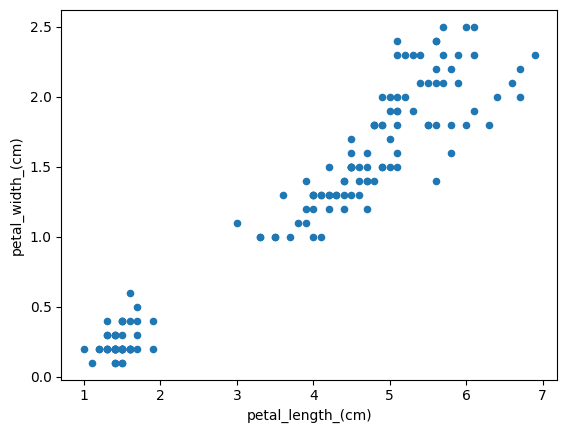

In [23]:
df_iris.plot(kind= 'scatter', x='petal_length_(cm)', y= 'petal_width_(cm)')

In [147]:
# another way to subset the columns

df_iris[['sepal_length_(cm)', 'petal_width_(cm)']].head()

,sepal_length_(cm),petal_width_(cm)
0,5.1,0.2
1,4.9,0.2
2,4.7,0.2
3,4.6,0.2
4,5.0,0.2


### aggregate function

In [26]:
df_iris['sepal_length_(cm)'].min(), df_iris['sepal_length_(cm)'].mean()

(4.3, 5.843333333333334)

In [31]:
df_iris.head()

,sepal_length_(cm),sepal_width_(cm),petal_length_(cm),petal_width_(cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [34]:
df_iris.groupby('species').mean()

,sepal_length_(cm),sepal_width_(cm),petal_length_(cm),petal_width_(cm)
species,,,,
setosa,5.006,3.428,1.462,0.246
versicolor,5.936,2.770,4.260,1.326
virginica,6.588,2.974,5.552,2.026


In [36]:
df_iris.groupby('species')['sepal_length_(cm)'].mean()

species
setosa        5.006
versicolor    5.936
virginica     6.588
Name: sepal_length_(cm), dtype: float64

In [57]:
df_iris['sepal_length_(cm)'].agg([min, max, np.mean, 'median'])

min       4.300000
max       7.900000
mean      5.843333
median    5.800000
Name: sepal_length_(cm), dtype: float64

In [51]:
df_iris[['sepal_length_(cm)', 'petal_width_(cm)']].aggregate(['min', np.max, np.mean, 'median'])

,sepal_length_(cm),petal_width_(cm)
min,4.300000,0.100000
amax,7.900000,2.500000
mean,5.843333,1.199333
median,5.800000,1.300000


In [56]:
df_iris.groupby('species').agg([np.min, 'mean'])

sepal_length_(cm)        sepal_width_(cm)        petal_length_(cm)  \
                        amin   mean             amin   mean              amin   
species                                                                         
setosa                   4.3  5.006              2.3  3.428               1.0   
versicolor               4.9  5.936              2.0  2.770               3.0   
virginica                4.9  6.588              2.2  2.974               4.5   

                  petal_width_(cm)         
             mean             amin   mean  
species                                    
setosa      1.462              0.1  0.246  
versicolor  4.260              1.0  1.326  
virginica   5.552              1.4  2.026

In [63]:
df_iris.groupby('species').aggregate([min, max , np.median])

sepal_length_(cm)             sepal_width_(cm)              \
                         min  max median              min  max median   
species                                                                 
setosa                   4.3  5.8    5.0              2.3  4.4    3.4   
versicolor               4.9  7.0    5.9              2.0  3.4    2.8   
virginica                4.9  7.9    6.5              2.2  3.8    3.0   

           petal_length_(cm)             petal_width_(cm)              
                         min  max median              min  max median  
species                                                                
setosa                   1.0  1.9   1.50              0.1  0.6    0.2  
versicolor               3.0  5.1   4.35              1.0  1.8    1.3  
virginica                4.5  6.9   5.55              1.4  2.5    2.0

In [67]:
n = np.arange(10, 30)

In [70]:
n

array([10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26,
       27, 28, 29])

In [71]:
for index, row in enumerate(n):

    print(f"index: {index} and value: {row}")

index: 0 and value: 10
index: 1 and value: 11
index: 2 and value: 12
index: 3 and value: 13
index: 4 and value: 14
index: 5 and value: 15
index: 6 and value: 16
index: 7 and value: 17
index: 8 and value: 18
index: 9 and value: 19
index: 10 and value: 20
index: 11 and value: 21
index: 12 and value: 22
index: 13 and value: 23
index: 14 and value: 24
index: 15 and value: 25
index: 16 and value: 26
index: 17 and value: 27
index: 18 and value: 28
index: 19 and value: 29


In [72]:
df_iris.head()

,sepal_length_(cm),sepal_width_(cm),petal_length_(cm),petal_width_(cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [73]:
# iterrows 

for index, row in df_iris.iterrows():

    print(f"index: {index}, row-0 {row[0]}, row-1 {row[1]}, row-2 {row[2]}, row-3 {row[3]}, row-4 {row[4]}")

index: 0, row-0 5.1, row-1 3.5, row-2 1.4, row-3 0.2, row-4 setosa
index: 1, row-0 4.9, row-1 3.0, row-2 1.4, row-3 0.2, row-4 setosa
index: 2, row-0 4.7, row-1 3.2, row-2 1.3, row-3 0.2, row-4 setosa
index: 3, row-0 4.6, row-1 3.1, row-2 1.5, row-3 0.2, row-4 setosa
index: 4, row-0 5.0, row-1 3.6, row-2 1.4, row-3 0.2, row-4 setosa
index: 5, row-0 5.4, row-1 3.9, row-2 1.7, row-3 0.4, row-4 setosa
index: 6, row-0 4.6, row-1 3.4, row-2 1.4, row-3 0.3, row-4 setosa
index: 7, row-0 5.0, row-1 3.4, row-2 1.5, row-3 0.2, row-4 setosa
index: 8, row-0 4.4, row-1 2.9, row-2 1.4, row-3 0.2, row-4 setosa
index: 9, row-0 4.9, row-1 3.1, row-2 1.5, row-3 0.1, row-4 setosa
index: 10, row-0 5.4, row-1 3.7, row-2 1.5, row-3 0.2, row-4 setosa
index: 11, row-0 4.8, row-1 3.4, row-2 1.6, row-3 0.2, row-4 setosa
index: 12, row-0 4.8, row-1 3.0, row-2 1.4, row-3 0.1, row-4 setosa
index: 13, row-0 4.3, row-1 3.0, row-2 1.1, row-3 0.1, row-4 setosa
index: 14, row-0 5.8, row-1 4.0, row-2 1.2, row-3 0.2, row

### filter

In [76]:
df_iris.filter(['sepal_length_(cm)']).head()

,sepal_length_(cm)
0,5.1
1,4.9
2,4.7
3,4.6
4,5.0


### apply

In [80]:
df_iris[['sepal_length_(cm)', 'sepal_width_(cm)']].apply(np.mean, axis='rows')

sepal_length_(cm)    5.843333
sepal_width_(cm)     3.057333
dtype: float64

In [82]:
df_iris[['sepal_length_(cm)', 'sepal_width_(cm)']].apply(np.sum, axis='columns')

0      8.6
1      7.9
2      7.9
3      7.7
4      8.6
      ... 
145    9.7
146    8.8
147    9.5
148    9.6
149    8.9
Length: 150, dtype: float64

In [84]:
df_iris['species'].apply(len).unique()

array([ 6, 10,  9], dtype=int64)

In [85]:
def transform_upper(x):

    x_upper = x.upper()

    return x_upper

In [86]:
df_iris['species'].apply(transform_upper)

0         SETOSA
1         SETOSA
2         SETOSA
3         SETOSA
4         SETOSA
         ...    
145    VIRGINICA
146    VIRGINICA
147    VIRGINICA
148    VIRGINICA
149    VIRGINICA
Name: species, Length: 150, dtype: object

In [96]:
df_iris['SPECIES'] = df_iris['SPECIES'].apply(lambda x: x.upper())

In [89]:
df_iris['species'].apply(lambda x: len(x))

0      6
1      6
2      6
3      6
4      6
      ..
145    9
146    9
147    9
148    9
149    9
Name: species, Length: 150, dtype: int64

In [90]:
df_iris.columns

Index(['sepal_length_(cm)', 'sepal_width_(cm)', 'petal_length_(cm)',
       'petal_width_(cm)', 'species'],
      dtype='object')

In [93]:
df_iris.columns = [x.upper() for x in df_iris.columns]

In [97]:
df_iris.head()

,SEPAL_LENGTH_(CM),SEPAL_WIDTH_(CM),PETAL_LENGTH_(CM),PETAL_WIDTH_(CM),SPECIES
0,5.1,3.5,1.4,0.2,SETOSA
1,4.9,3.0,1.4,0.2,SETOSA
2,4.7,3.2,1.3,0.2,SETOSA
3,4.6,3.1,1.5,0.2,SETOSA
4,5.0,3.6,1.4,0.2,SETOSA


### joins dataset

In [14]:
sales_2020 = {'names':['shoes', 'shirts'],
              'revenue': [1000, 2000],
              'sold_qty': [5, 6]
}

In [15]:
sales_2021 = {'names':['shoes', 'shirts', 'trousers'],
              'revenue': [1000, 2000, 3000],
              'sold_qty': [5, 6, 8]
}

In [16]:
sales_2020_df = pd.DataFrame(sales_2020)
sales_2021_df = pd.DataFrame(sales_2021)

In [17]:
sales_2020_df.head()

,names,revenue,sold_qty
0,shoes,1000,5
1,shirts,2000,6


In [18]:
sales_2021_df

,names,revenue,sold_qty
0,shoes,1000,5
1,shirts,2000,6
2,trousers,3000,8


In [23]:
full_sales = pd.concat([sales_2020_df, sales_2021_df], axis='rows')

In [24]:
manufac = {'names': ['shoes','shirts', 'trousers'],
            'location': ['Taiwan', 'China', 'India']
    }

In [25]:
manufac_df = pd.DataFrame(manufac)

In [26]:
manufac_df.head()

,names,location
0,shoes,Taiwan
1,shirts,China
2,trousers,India


In [27]:
full_sales.head()

,names,revenue,sold_qty
0,shoes,1000,5
1,shirts,2000,6
0,shoes,1000,5
1,shirts,2000,6
2,trousers,3000,8


In [30]:
full_sales = full_sales.rename(columns={'names': 'new_names'})

In [31]:
full_sales.head()

,new_names,revenue,sold_qty
0,shoes,1000,5
1,shirts,2000,6
0,shoes,1000,5
1,shirts,2000,6
2,trousers,3000,8


In [34]:
# joins parameters - how(default - inner) and on

pd.merge(full_sales, manufac_df, left_on='new_names', right_on='names').drop(columns=['new_names'])

,revenue,sold_qty,names,location
0,1000,5,shoes,Taiwan
1,1000,5,shoes,Taiwan
2,2000,6,shirts,China
3,2000,6,shirts,China
4,3000,8,trousers,India


In [35]:
merged_df = pd.merge(full_sales, manufac_df, left_on='new_names', right_on='names')

In [36]:
merged_df.head()

,new_names,revenue,sold_qty,names,location
0,shoes,1000,5,shoes,Taiwan
1,shoes,1000,5,shoes,Taiwan
2,shirts,2000,6,shirts,China
3,shirts,2000,6,shirts,China
4,trousers,3000,8,trousers,India


In [37]:
del merged_df['new_names']

In [38]:
merged_df.head()

,revenue,sold_qty,names,location
0,1000,5,shoes,Taiwan
1,1000,5,shoes,Taiwan
2,2000,6,shirts,China
3,2000,6,shirts,China
4,3000,8,trousers,India


In [39]:
user_usage = pd.read_csv('../data/user_usage.csv')

user_device = pd.read_csv('../data/user_device.csv')

In [40]:
user_usage.head()

,outgoing_mins_per_month,outgoing_sms_per_month,monthly_mb,use_id
0,21.97,4.82,1557.33,22787
1,1710.08,136.88,7267.55,22788
2,1710.08,136.88,7267.55,22789
3,94.46,35.17,519.12,22790
4,71.59,79.26,1557.33,22792


In [41]:
user_device.head()

,use_id,user_id,platform,platform_version,device,use_type_id
0,22782,26980,ios,10.2,"iPhone7,2",2
1,22783,29628,android,6.0,Nexus 5,3
2,22784,28473,android,5.1,SM-G903F,1
3,22785,15200,ios,10.2,"iPhone7,2",3
4,22786,28239,android,6.0,ONE E1003,1


### inner join

In [44]:
pd.merge(user_usage, user_device, on = 'use_id').tail()

,outgoing_mins_per_month,outgoing_sms_per_month,monthly_mb,use_id,user_id,platform,platform_version,device,use_type_id
154,198.59,90.49,5191.12,23043,28953,android,6.0,SM-G900F,1
155,198.59,90.49,3114.67,23044,28953,android,6.0,SM-G900F,1
156,106.65,82.13,5191.12,23046,29454,android,6.0,Moto G (4),1
157,344.53,20.53,519.12,23049,29725,android,6.0,SM-G900F,1
158,42.75,46.83,5191.12,23053,20257,android,5.1,Vodafone Smart ultra 6,1


### left join

In [45]:
pd.merge(user_usage, user_device, on = 'use_id', how = 'left').tail()

,outgoing_mins_per_month,outgoing_sms_per_month,monthly_mb,use_id,user_id,platform,platform_version,device,use_type_id
235,260.66,68.44,896.96,25008,NaN,NaN,NaN,NaN,NaN
236,97.12,36.50,2815.00,25040,NaN,NaN,NaN,NaN,NaN
237,355.93,12.37,6828.09,25046,NaN,NaN,NaN,NaN,NaN
238,632.06,120.46,1453.16,25058,NaN,NaN,NaN,NaN,NaN
239,488.70,906.92,3089.85,25220,NaN,NaN,NaN,NaN,NaN


### right join

In [46]:
pd.merge(user_usage, user_device, on = 'use_id', how = 'right').tail()

,outgoing_mins_per_month,outgoing_sms_per_month,monthly_mb,use_id,user_id,platform,platform_version,device,use_type_id
267,344.53,20.53,519.12,23049,29725,android,6.0,SM-G900F,1
268,NaN,NaN,NaN,23050,29726,ios,10.2,"iPhone7,2",3
269,NaN,NaN,NaN,23051,29726,ios,10.2,"iPhone7,2",3
270,NaN,NaN,NaN,23052,29727,ios,10.1,"iPhone8,4",3
271,42.75,46.83,5191.12,23053,20257,android,5.1,Vodafone Smart ultra 6,1


In [47]:
pd.merge(user_usage, user_device, on = 'use_id', how = 'outer').tail()

,outgoing_mins_per_month,outgoing_sms_per_month,monthly_mb,use_id,user_id,platform,platform_version,device,use_type_id
348,NaN,NaN,NaN,23047,29720.0,ios,10.2,"iPhone7,1",2.0
349,NaN,NaN,NaN,23048,29724.0,android,6.0,ONEPLUS A3003,3.0
350,NaN,NaN,NaN,23050,29726.0,ios,10.2,"iPhone7,2",3.0
351,NaN,NaN,NaN,23051,29726.0,ios,10.2,"iPhone7,2",3.0
352,NaN,NaN,NaN,23052,29727.0,ios,10.1,"iPhone8,4",3.0


In [48]:
pd.merge(user_usage, user_device, on = 'use_id', how = 'outer').shape

(353, 9)

In [49]:
user_usage.shape, user_device.shape

((240, 4), (272, 6))

### Feature Transformation


In [13]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [14]:
Mscaler = MinMaxScaler()
Sscaler = StandardScaler()

In [17]:
Mscaler_model = Mscaler.fit(df_iris[['sepal_length_(cm)', 'sepal_width_(cm)', 'petal_length_(cm)', 'petal_width_(cm)']])

In [22]:
df_iris_MinMax = pd.DataFrame(Mscaler_model.transform(df_iris[['sepal_length_(cm)', 'sepal_width_(cm)', 'petal_length_(cm)', 'petal_width_(cm)']]), columns = ['sepal_length_(cm)', 'sepal_width_(cm)', 'petal_length_(cm)', 'petal_width_(cm)'])

In [24]:
df_iris_MinMax['species'] = df_iris['species']

In [25]:
df_iris_MinMax.head()

,sepal_length_(cm),sepal_width_(cm),petal_length_(cm),petal_width_(cm),species
0,0.222222,0.625000,0.067797,0.041667,setosa
1,0.166667,0.416667,0.067797,0.041667,setosa
2,0.111111,0.500000,0.050847,0.041667,setosa
3,0.083333,0.458333,0.084746,0.041667,setosa
4,0.194444,0.666667,0.067797,0.041667,setosa


In [26]:
df_iris_MinMax.describe()

,sepal_length_(cm),sepal_width_(cm),petal_length_(cm),petal_width_(cm)
count,150.000000,150.000000,150.000000,150.000000
mean,0.428704,0.440556,0.467458,0.458056
std,0.230018,0.181611,0.299203,0.317599
min,0.000000,0.000000,0.000000,0.000000
25%,0.222222,0.333333,0.101695,0.083333
50%,0.416667,0.416667,0.567797,0.500000
75%,0.583333,0.541667,0.694915,0.708333
max,1.000000,1.000000,1.000000,1.000000


In [27]:
Sscaler_model = Sscaler.fit(df_iris[['sepal_length_(cm)', 'sepal_width_(cm)', 'petal_length_(cm)', 'petal_width_(cm)']])

In [28]:
df_iris_Std = pd.DataFrame(Sscaler_model.transform(df_iris[['sepal_length_(cm)', 'sepal_width_(cm)', 'petal_length_(cm)', 'petal_width_(cm)']]), columns = ['sepal_length_(cm)', 'sepal_width_(cm)', 'petal_length_(cm)', 'petal_width_(cm)'])

In [29]:
df_iris_Std.head()

,sepal_length_(cm),sepal_width_(cm),petal_length_(cm),petal_width_(cm)
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444


In [31]:
df_iris_Std.describe().round(2)

,sepal_length_(cm),sepal_width_(cm),petal_length_(cm),petal_width_(cm)
count,150.00,150.00,150.00,150.00
mean,-0.00,-0.00,-0.00,-0.00
std,1.00,1.00,1.00,1.00
min,-1.87,-2.43,-1.57,-1.45
25%,-0.90,-0.59,-1.23,-1.18
50%,-0.05,-0.13,0.34,0.13
75%,0.67,0.56,0.76,0.79
max,2.49,3.09,1.79,1.71


### Feature Encoding

In [91]:
df_mall = pd.read_csv('../data/Mall.csv')

In [47]:
df_mall.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [37]:
type(df_mall)

pandas.core.frame.DataFrame

In [38]:
df_mall.isnull().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [34]:
from sklearn.preprocessing import LabelEncoder

In [40]:
encoder = LabelEncoder()

df_mall['Gender'] = encoder.fit_transform(df_mall['Genre'])
df_mall.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),Gender
0,1,Male,19,15,39,1
1,2,Male,21,15,81,1
2,3,Female,20,16,6,0
3,4,Female,23,16,77,0
4,5,Female,31,17,40,0


In [41]:
df_mall.drop(columns = ['Genre'], inplace = True)

In [42]:
df_mall.head()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Gender
0,1,19,15,39,1
1,2,21,15,81,1
2,3,20,16,6,0
3,4,23,16,77,0
4,5,31,17,40,0


In [43]:
df_iris.columns

Index(['sepal_length_(cm)', 'sepal_width_(cm)', 'petal_length_(cm)',
       'petal_width_(cm)', 'species'],
      dtype='object')

In [44]:
encoder = LabelEncoder()

df_iris['species'] = encoder.fit_transform(df_iris['species'])
df_iris.head()

,sepal_length_(cm),sepal_width_(cm),petal_length_(cm),petal_width_(cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [45]:
df_iris.species.value_counts()

0    50
1    50
2    50
Name: species, dtype: int64

### One Hot Encoding with pd.get_dummies

In [51]:
dummy_gender = pd.get_dummies(df_mall['Genre']).head()

In [52]:
dummy_gender.head(2)

,Female,Male
0,0,1
1,0,1


In [53]:
df_mall.head(2)

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81


In [57]:
df_mall = pd.merge(df_mall, dummy_gender, left_index=True, right_index=True).drop(columns = ['Genre']).head()

In [58]:
df_mall.head()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Female,Male
0,1,19,15,39,0,1
1,2,21,15,81,0,1
2,3,20,16,6,1,0
3,4,23,16,77,1,0
4,5,31,17,40,1,0


In [61]:
data1 = {'Name': ['Deepak', 'Bharti','Shubham', 'Raj'],
         'Age': [20, 21, 22, 23],
         'Address': ['Nagpur', 'Kanpur', 'Satara', 'Pune'],
         'Qualification': ['BE', 'BA', 'BCOM', 'BCA']
}

data2 = {'Name': ['Deepak_1', 'Bharti_1','Shubham_1', 'Raj_1'],
         'Age': [25, 26, 27, 28],
         'Address': ['Mumbai', 'Delhi', 'Vizag', 'Jaipur'],
         'Qualification': ['BE_1', 'BA_1', 'BCOM_1', 'BCA_1']
}


In [62]:
df_1 = pd.DataFrame(data1, index = [0, 1, 2, 3])
df_2 = pd.DataFrame(data2, index = [2, 3, 6, 7])

In [64]:
print(df_1, '\n\n', df_2)

      Name  Age Address Qualification
0   Deepak   20  Nagpur            BE
1   Bharti   21  Kanpur            BA
2  Shubham   22  Satara          BCOM
3      Raj   23    Pune           BCA 

         Name  Age Address Qualification
2   Deepak_1   25  Mumbai          BE_1
3   Bharti_1   26   Delhi          BA_1
6  Shubham_1   27   Vizag        BCOM_1
7      Raj_1   28  Jaipur         BCA_1


In [66]:
# concatenating multiple dataframes

pd.concat([df_1, df_2])

,Name,Age,Address,Qualification
0,Deepak,20,Nagpur,BE
1,Bharti,21,Kanpur,BA
2,Shubham,22,Satara,BCOM
3,Raj,23,Pune,BCA
2,Deepak_1,25,Mumbai,BE_1
3,Bharti_1,26,Delhi,BA_1
6,Shubham_1,27,Vizag,BCOM_1
7,Raj_1,28,Jaipur,BCA_1


In [68]:
pd.concat([df_1, df_2], axis = 'columns', join ='inner')

,Name,Age,Address,Qualification,Name,Age,Address,Qualification
2,Shubham,22,Satara,BCOM,Deepak_1,25,Mumbai,BE_1
3,Raj,23,Pune,BCA,Bharti_1,26,Delhi,BA_1


In [69]:
# append
df_1.append(df_2)

C:\Users\butt_\AppData\Local\Temp\ipykernel_20792\1905140436.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_1.append(df_2)


,Name,Age,Address,Qualification
0,Deepak,20,Nagpur,BE
1,Bharti,21,Kanpur,BA
2,Shubham,22,Satara,BCOM
3,Raj,23,Pune,BCA
2,Deepak_1,25,Mumbai,BE_1
3,Bharti_1,26,Delhi,BA_1
6,Shubham_1,27,Vizag,BCOM_1
7,Raj_1,28,Jaipur,BCA_1


In [71]:
# concat dataframe and series

s1 = pd.Series([100, 200, 300, 400], name = 'Salary')

In [81]:
df_new = pd.concat([df_1, s1], axis = 'columns')

In [82]:
df_new.dtypes

Name             object
Age                int8
Address          object
Qualification    object
Salary            int64
dtype: object

In [78]:
# type casting
import numpy as np
df_1['Age'] = df_1['Age'].astype(np.int8)

In [80]:
df_1.dtypes

Name             object
Age                int8
Address          object
Qualification    object
dtype: object

In [83]:
df_new['Salary'].astype('float')

0    100.0
1    200.0
2    300.0
3    400.0
Name: Salary, dtype: float64

In [84]:
# multiple columns type casting


df_new[['Age', 'Salary']].astype(float)

,Age,Salary
0,20.0,100.0
1,21.0,200.0
2,22.0,300.0
3,23.0,400.0


#### pivot tables

In [85]:
df_iris.columns

Index(['sepal_length_(cm)', 'sepal_width_(cm)', 'petal_length_(cm)',
       'petal_width_(cm)', 'species'],
      dtype='object')

In [87]:
df_iris.pivot_table(index = 'species', values = 'sepal_length_(cm)', aggfunc= 'sum')

,sepal_length_(cm)
species,
0,250.3
1,296.8
2,329.4


In [88]:
df_iris.pivot_table(index = 'species', values = 'sepal_length_(cm)', aggfunc= 'min')

,sepal_length_(cm)
species,
0,4.3
1,4.9
2,4.9


In [89]:
df_iris.groupby('species')['sepal_length_(cm)'].min()

species
0    4.3
1    4.9
2    4.9
Name: sepal_length_(cm), dtype: float64

In [92]:
df_mall.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [94]:
df_mall.pivot_table(index = ['Genre'], values = ['Age', 'Spending Score (1-100)'], aggfunc = ['min', 'mean']).round(2)

min                          mean                       
       Age Spending Score (1-100)    Age Spending Score (1-100)
Genre                                                          
Female  18                      5  38.10                  51.53
Male    18                      1  39.81                  48.51

In [100]:
df_mall = pd.read_csv('../data/mall.csv')

In [101]:
df_mall.head()

,CustomerID,Genre,Age,Age_Bracket,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,<25,15,39
1,2,Male,21,<25,15,81
2,3,Female,20,<25,16,6
3,4,Female,23,<25,16,77
4,5,Female,31,25_35,17,40


In [105]:
# using multiple aggregator

df_mall.pivot_table(index = ['Genre', 'Age_Bracket'], values = ['Spending Score (1-100)', 'Annual Income (k$)'], aggfunc = ['mean']).round(2)

mean                       
                   Annual Income (k$) Spending Score (1-100)
Genre  Age_Bracket                                          
Female 25_35                    62.43                  64.65
       <25                      43.95                  58.65
       >36                      62.67                  40.11
Male   25_35                    77.35                  64.13
       <25                      47.61                  50.83
       >36                      60.43                  39.98

## Updated